In [10]:
from PIL import Image
import io
import base64

In [11]:
def image2base64(image):
    buffered = io.BytesIO()
    image.save(buffered, format="png")
    base64_string = base64.b64encode(buffered.getvalue())
    return base64_string

def base642image(base64_string):
    imgdata = base64.b64decode(base64_string)
    image = Image.open(io.BytesIO(imgdata))
    return image

In [12]:
def read_data(csv_path):
    with open(csv_path, "r") as file:
        lines = file.read().splitlines()
    return [ line.split(",") for line in lines ]

In [13]:
import requests

In [14]:
host = "http://localhost:8000"

In [15]:
test_data = read_data("test.csv")

In [16]:
index = -5

image_path = test_data[index][0]
y = int(test_data[index][1])

In [17]:
image = Image.open(image_path)
b64 = image2base64(image)
respone = requests.post(host + "/api", json={"image": b64.decode()})
respone.json()

{'class': 'without mask'}

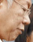

In [18]:
image